In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv("pulsar_stars.csv")

In [3]:
data

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
5,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0
6,119.484375,48.765059,0.031460,-0.112168,0.999164,9.279612,19.206230,479.756567,0
7,130.382812,39.844056,-0.158323,0.389540,1.220736,14.378941,13.539456,198.236457,0
8,107.250000,52.627078,0.452688,0.170347,2.331940,14.486853,9.001004,107.972506,0
9,107.257812,39.496488,0.465882,1.162877,4.079431,24.980418,7.397080,57.784738,0


In [4]:
x1 = np.array(data[' Skewness of the integrated profile'])
x2 = np.array(data[' Mean of the integrated profile'])
y = np.array(data['target_class'])

In [5]:
x = np.column_stack((x1,x2))

In [6]:
x.shape

(17898, 2)

In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2)

In [8]:
scaler = MinMaxScaler()  #normalize

In [9]:
x_train = scaler.fit_transform(xtrain)
x_test = scaler.fit_transform(xtest)

In [10]:
int(np.sqrt(len(x_train)))

119

In [11]:
classifier = KNeighborsClassifier(n_neighbors = 94, metric = 'minkowski', p=2)    #n_neighbors= K

In [12]:
classifier.fit(x_train, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=94, p=2,
           weights='uniform')

In [13]:
y_pred = classifier.predict(x_test)

In [14]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [15]:
cm = confusion_matrix(ytest, y_pred)

In [16]:
cm

array([[3237,   10],
       [ 109,  224]], dtype=int64)

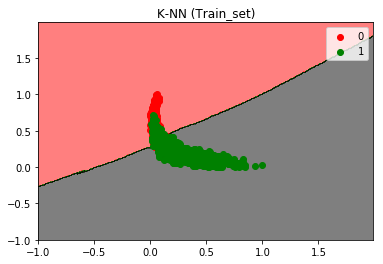

In [17]:
X_set, y_set = x_train, ytrain

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min()-1, stop = X_set[:, 0].max()+1, step = 0.01),
                     np.arange(start = X_set[:, 1].min()-1, stop = X_set[:, 1].max()+1, step = 0.01))

plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.5, cmap = ListedColormap(('red', 'green','black')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j,1],
               c = ListedColormap(('red', 'green', 'black'))(i), label = j)
    
plt.title('K-NN (Train_set)')
plt.legend()

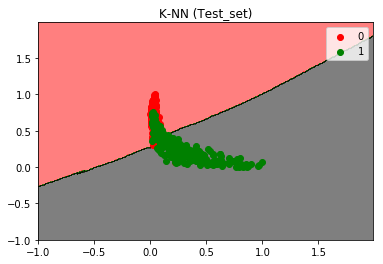

In [18]:
X_set, y_set = x_test, ytest

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min()-1, stop = X_set[:, 0].max()+1, step = 0.01),
                     np.arange(start = X_set[:, 1].min()-1, stop = X_set[:, 1].max()+1, step = 0.01))

plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.5, cmap = ListedColormap(('red', 'green','black')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j,1],
               c = ListedColormap(('red', 'green', 'black'))(i), label = j)
    
plt.title('K-NN (Test_set)')
plt.legend()

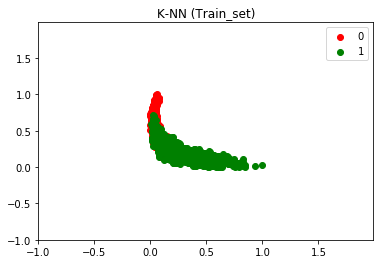

In [19]:
X_set, y_set = x_train, ytrain

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min()-1, stop = X_set[:, 0].max()+1, step = 0.01),
                     np.arange(start = X_set[:, 1].min()-1, stop = X_set[:, 1].max()+1, step = 0.01))

# plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
#             alpha = 0.5, cmap = ListedColormap(('red', 'green','black')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j,1],
               c = ListedColormap(('red', 'green', 'black'))(i), label = j)
    
plt.title('K-NN (Train_set)')
plt.legend()

In [20]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest, y_pred))

0.9667597765363128
